# Chapter 2 - N-armed Bandits

**Deep Reinforcement Learning _in Action_**

## 2. 여러 팔 강도 문제의 해법

### 2.1 탐험과 활용

#### Listing 2.1 기대 보상에 근거해서 최선의 동작을 찾는 파이썬 3 코드

In [1]:
def get_best_action(actions):
    best_action = 0
    max_action_value = 0
    for i in range(len(actions)):  # A
        cur_action_value = get_action_value(actions[i])  # B
        if cur_action_value > max_action_value:
            best_action = i
            max_action_value = cur_action_value
    return best_action

### 2.2 엡실론 탐욕 전략

#### Listing 2.2 엡실론 탐욕 전략에 따른 동작 선택

In [4]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [5]:
n = 10
probs = np.random.rand(n)
eps = 0.2

#### Listing 2.3 보상 함수

In [6]:
def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [7]:
reward_test = [get_reward(0.7) for _ in range(2000)]

In [8]:
np.mean(reward_test)

7.006

In [9]:
sum = 0
x = [4, 5, 6, 7]
for i in range(len(x)):
    sum = sum + x[i]
sum

22

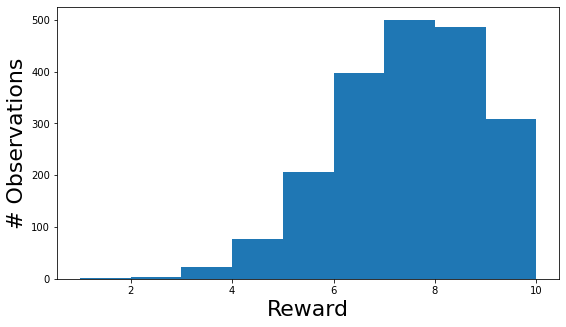

In [10]:
plt.figure(figsize=(9, 5))
plt.xlabel('Reward', fontsize=22)
plt.ylabel('# Observations', fontsize=22)
plt.hist(reward_test, bins=9)
plt.show()

#### Listing 2.4 보상 기록 갱신

In [11]:
# 10 actions x 2 columns
# Columns: Count #, Avg Reward
record = np.zeros((n, 2))
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [12]:
def update_record(record, action, r):
    new_r = (record[action, 0] * record[action, 1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1
    record[action, 1] = new_r
    return record

#### Listing 2.5 최선의 동작 선택

In [13]:
def get_best_arm(record):
    arm_index = np.argmax(record[:, 1], axis=0)
    return arm_index

#### Listing 2.6 여러 팔 강도 문제의 해법

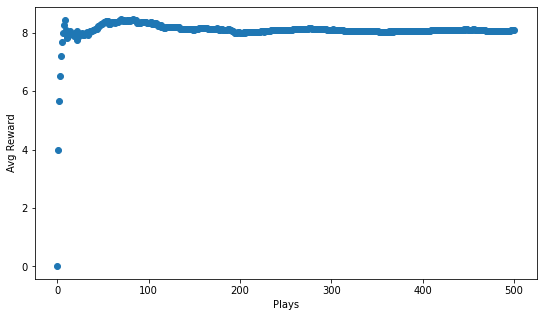

In [14]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Plays')
ax.set_ylabel('Avg Reward')
fig.set_size_inches(9, 5)

n = 10
record = np.zeros((n, 2))
probs = np.random.rand(n)
eps = 0.2

rewards = [0]
for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(n)
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i + 1) * rewards[-1] + r) / (i + 2)
    rewards.append(mean_reward)
    
ax.scatter(np.arange(len(rewards)), rewards)
plt.show()

### 소프트맥스 선택 정책

#### Listing 2.7 소프트맥스 함수

In [15]:
def softmax(av, tau=1.12):
    softm = np.exp(av / tau) / np.sum(np.exp(av / tau))
    return softm

In [16]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
av = np.zeros(10)
av

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
p = softmax(av)
p

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [19]:
np.random.choice(x, p=p)

6

#### Listing 2.8 소프트맥스 동작 선택을 이용한 여러 팔 강도 문제의 해법

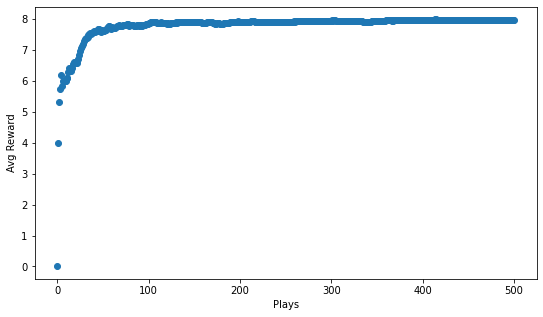

In [20]:
n = 10
probs = np.random.rand(n)
record = np.zeros((n, 2))

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Plays')
ax.set_ylabel('Avg Reward')
fig.set_size_inches(9, 5)

rewards = [0]
for i in range(500):
    p = softmax(record[:, 1])
    choice = np.random.choice(np.arange(n), p=p)
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i + 1) * rewards[-1] + r) / (i + 2)
    rewards.append(mean_reward)

ax.scatter(np.arange(len(rewards)), rewards)
plt.show()

## 4. PyTorch 로 신경망 만들기

### 4.1 자동 미분

In [21]:
import torch

In [22]:
x = torch.Tensor([2, 4])  # 입력 데이터
x

tensor([2., 4.])

In [23]:
m = torch.randn(2, requires_grad=True)  # 매개변수 1
m

tensor([-0.0655, -0.2053], requires_grad=True)

In [25]:
b = torch.randn(1, requires_grad=True)  # 매개변수 2
b

tensor([-0.3655], requires_grad=True)

In [26]:
y = m*x + b  # 선형 회귀 모형
y

tensor([-0.4965, -1.1867], grad_fn=<AddBackward0>)

In [30]:
y_known = torch.Tensor([8, 2])

In [31]:
loss = (torch.sum(y_known - y))**2  # 손실함수
loss

tensor(136.4968, grad_fn=<PowBackward0>)

In [32]:
loss.backward()  # 기울기들이 계산된다.

In [34]:
m.grad

tensor([-46.7327, -93.4655])

In [35]:
b.grad

tensor([-46.7327])

### 4.2 모형의 구축

```
model = torch.nn.Sequential(
    torch.nn.Linear(10, 150),
    torch.nn.ReLU(),
    torch.nn.Linear(150, 4),
    torch.nn.ReLU(),
)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for step in range(100):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_correct)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

```
from torch.nn import Module, Linear

class MyNet(Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = Linear(784, 50)
        self.fc2 = Linear(50, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
        
model = MyNet()
```

## 5. 문맥적 강도 문제의 해법

### Listing 2.9 문맥저거 강도 문제의 환경

In [40]:
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
        
    def init_distribution(self, arms):
        self.bandit_matrix = np.random.rand(arms, arms)
        
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward
    
    def get_state(self):
        return self.state
    
    def update_state(self):
        self.state = np.random.randint(0, self.arms)
        
    def get_reward(self, arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])
    
    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward

In [46]:
env = ContextBandit(arms=10)
state = env.get_state()
reward = env.choose_arm(1)
print(state)
print(reward)

3
6


In [48]:
import numpy as np
import torch

In [73]:
arms = 10
N, D_in, H, D_out = 1, arms, 100, arms  # N : batch_size, D_in : input_dim, H : hidden_dim, D_out : output_dim

In [74]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.ReLU(),
)

In [75]:
loss_fn = torch.nn.MSELoss()

In [76]:
env = ContextBandit(arms)

In [77]:
def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

In [78]:
one_hot(5, 1)

array([0., 1., 0., 0., 0.])

### Listing 2.10 주 훈련 루프

In [79]:
def train(env, epochs=5000, learning_rate=1e-2):
    cur_state = torch.Tensor(one_hot(arms, env.get_state()))
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []
    for i in range(epochs):
        y_pred = model(cur_state)
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0)
        av_softmax /= av_softmax.sum()
        choice = np.random.choice(arms, p=av_softmax)
        cur_reward = env.choose_arm(choice)
        one_hot_reward = y_pred.data.numpy().copy()
        one_hot_reward[choice] = cur_reward
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_state = torch.Tensor(one_hot(arms, env.get_state()))
    return np.array(rewards)

In [80]:
def running_mean(x, N=50):
    c = x.shape[0] - N
    y = np.zeros(c)
    conv = np.ones(N)
    for i in range(c):
        y[i] = (x[i:i+N] @ conv) / N
    return y

In [81]:
rewards = train(env)

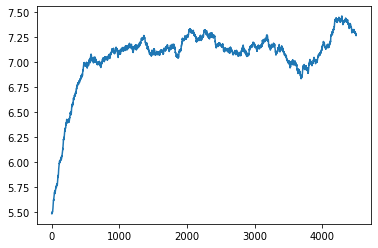

In [82]:
plt.plot(running_mean(rewards, N=500))
plt.show()